In [24]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [25]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_model_names

lcset_name = 'test'
rootdir = '../save'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '.'

model_names = get_model_names(rootdir, cfilename, kf, lcset_name)
model_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~bypass=0',
 'mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=GRU~bypass=0',
 'mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=LSTM~bypass=0',
 'mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~bypass=0',
 'mdl=SerialTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=64-64-64-64~dec-emb=64-64-64-64~bypass=0',
 'mdl=SerialTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=64-64-64-64~dec-emb=64-64-64-64~bypass=0',
 'mdl=SerialRNN~in-dims=3~te-dims=0~enc-emb=64-64-64-64~dec-emb=64-64-64-64~cell=GRU~bypass=0',
 'mdl=SerialRNN~in-dims=3~te-dims=0~enc-emb=64-64-64-64~dec-emb=64-64-64-64~cell=LSTM~bypass=0']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=GRU~bypass=0
ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=LSTM~bypass=0
ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - mode

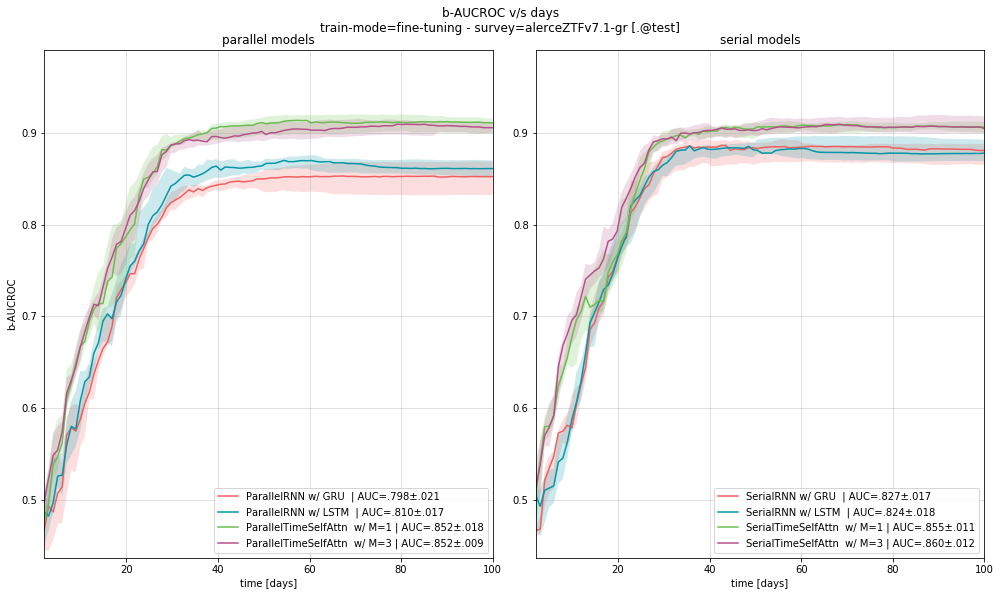

ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=GRU~bypass=0
ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=LSTM~bypass=0
ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~d

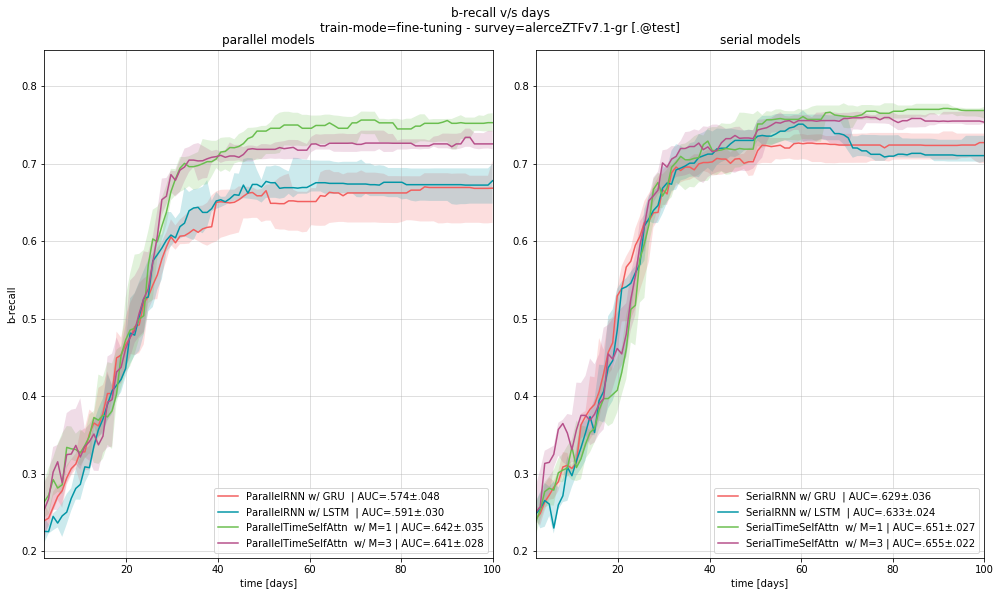

ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=GRU~bypass=0
ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=LSTM~bypass=0
ids=['0@id=1000', '0@id=1001', '0@id=1002', '1@id=1000', '1@id=1001', '1@id=1002', '2@id=1000', '2@id=1001', '2@id=1002', '3@id=1000', '3@id=1001', '3@id=1002', '4@id=1000', '4@id=1001', '4@id=1002'](n=15#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=2~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~d

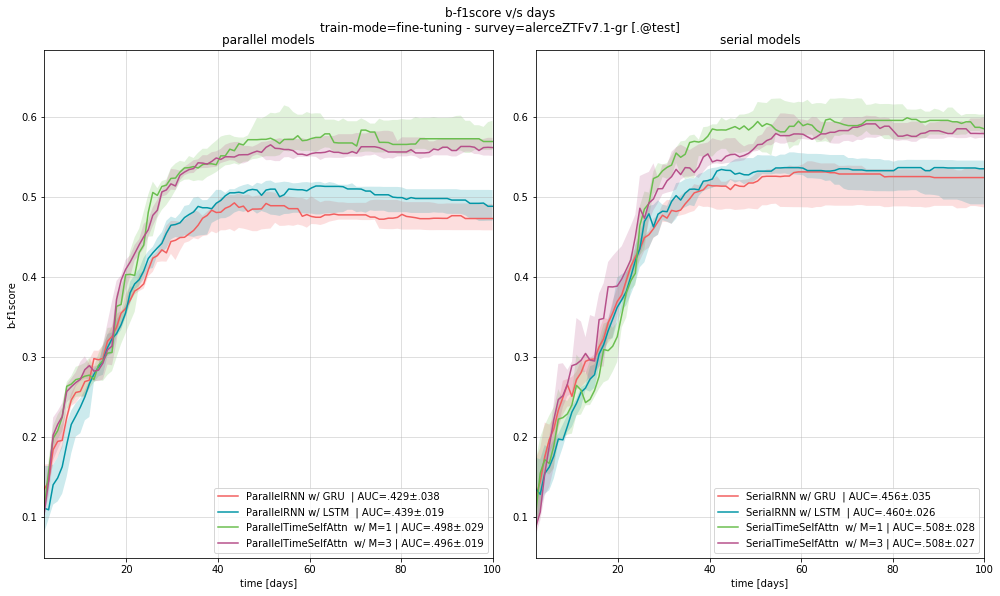

In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from lcclassifier.results.plots import plot_metric

dmetrics = {
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    #'baselines_dict':baselines_dict,
    'p':30, # None 5 10 25 30
}
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)

In [ ]:
assert 0

In [23]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_ps_performance_df
from fuzzytools.latex.latex_tables import LatexTable

dmetrics = {
    f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    'uses_avg':False, # False True
    'day':100,
    #'override_model_name':False, # False True
    #'baseline_filedir':f'../temp/baseline~mode=all.df',
    }
info_df = get_ps_performance_df(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)
for k in range(0, len(info_df)):
    info_df.indexs[k] = info_df.indexs[k].replace('=', '***').replace('model***', 'model=')
display(info_df())

caption = ''
caption += f'Baseline method v/s deep learning models.'
latex_kwargs = {
    'caption':caption,
    'label':'?',
    'bold_axis':'columns',
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,b-precision,b-recall,b-f1score,b-AUCROC
model=ParallelRNN w/ GRU,.512±.027,.648±.070,.475±.051,.854±.030
model=ParallelRNN w/ LSTM,.522±.019,.673±.041,.489±.025,.864±.020
model=ParallelTimeSelfAttn w/ M***1,.579±.024,.737±.053,.572±.039,.906±.022
model=ParallelTimeSelfAttn w/ M***3,.569±.017,.736±.037,.568±.027,.906±.013
model=SerialRNN w/ GRU,.537±.032,.719±.026,.509±.036,.880±.019
model=SerialRNN w/ LSTM,.527±.024,.725±.045,.512±.030,.877±.022
model=SerialTimeSelfAttn w/ M***1,.582±.020,.769±.024,.593±.024,.908±.014
model=SerialTimeSelfAttn w/ M***3,.572±.021,.760±.020,.586±.025,.909±.013


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{Baseline method v/s deep learning models.}
\label{?}\vspace{.1cm}
\begin{tabular}{l|cccc}
\hline
model & b-precision & b-recall & b-f1score & b-AUCROC \srule\\\hline\hline
ParallelRNN w/ GRU  & .512$\pm$.027 & .648$\pm$.070 & .475$\pm$.051 & .854$\pm$.030  \srule\\
ParallelRNN w/ LSTM  & .522$\pm$.019 & .673$\pm$.041 & .489$\pm$.025 & .864$\pm$.020  \srule\\
ParallelTimeSelfAttn  w/ M***1 & .579$\pm$.024 & .737$\pm$.053 & .572$\pm$.039 & .906$\pm$.022  \srule\\
ParallelTimeSelfAttn  w/ M***3 & .569$\pm$.017 & .736$\pm$.037 & .568$\pm$.027 & .906$\pm$.013  \srule\\
SerialRNN w/ GRU  & .537$\pm$.032 & .719$\pm$.026 & .509$\pm$.036 & .880$\pm$.019  \srule\\
SerialRNN w/ LSTM  & .527$\pm$.024 & .725$\pm$.045 & .512$\pm$.030 & .877$\pm$.022  \srule\\
SerialTimeSelfAttn  w/ M***1 & \textbf{.582$\pm$.020} & \te

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['id=1000'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~bypass=0
100%|██████████, 100.0/100.0 [days]


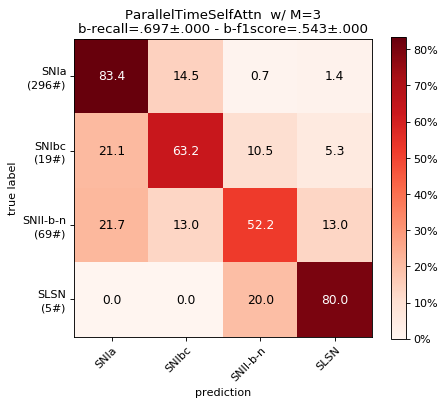

ids=['id=1000'](n=1#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~cell=GRU~bypass=0
100%|██████████, 100.0/100.0 [days]


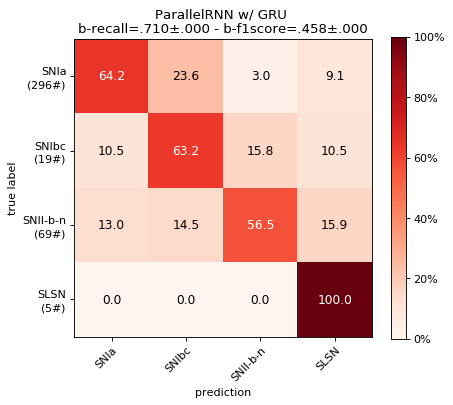

In [10]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

lcset_name = 'test'
kwargs = {
    'export_animation':False, # False True
}
plot_cm(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_temporal_encoding

lcset_name = f'train.{method}'
kwargs = {
    }
plot_temporal_encoding(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_ps_times_df

kwargs = {
    }
info_df = get_ps_times_df(rootdir, cfilename, kf, method, model_names, **kwargs)
info_df()